# Bayesian Inference on Click Through Rate

In this lecture, we're giving a Python code demo of how to estimate the cost of online advertisements through a Bayesian inference on the click through rate. 

In internet marketing, click-through rate (CTR) is a metric that measures the number of clicks advertisers receive on their ads per number of impressions. This metric is widely applied to online advertising and e-commerce. For online advertising, search engine and social media has been exerting tremendous influence on various industries, and almost a half of the population in the world has interacted with search engines and social media at least once a day. That makes computer websites and mobile both driving forces facilitating online commerce through advertisements.

Search engine and social media advertising have become a significant element of the web browsing experience. Looking at search engines, for example, the advertising revenue of the three classical search engines (i.e. Google, Yahoo, and Bing) achieves at least 50 billion dollars per year and is still rising gradually. Search engine advertising usually uses the keyword auction business model, and the advertisers pay the cost of the keywords. The primary means is pay-per-click with a cost-per-click (CPC) billing, which means that the search engine is paid every time the ad is clicked by users. So the expected revenue from an ad is a function of CTR and CPC: $CTR * CPC$. 
In other words, the cost paid by the advertisers is the same: $CTR * CPC$. 
Thus, having a clear understanding of CTR of an ad is critical for advertisers to allocate expenditures wisely, and for search engine providers to maximize the revenue and potentially, improve user satisfaction. So let's get started!


In [ ]:
# To model the probability distribution of click-through rate, we need to import the stats module
# from the scipy library.
from scipy import stats

# Click-through rate has a binary outcome for each impression: click or not click. There's nothing in between.
# So a binomial distribution is appropriate to inform you how many clicks are generated given a fixed 
# number of impressions. In this case, the number of impressions is 100.
stats.binom.rvs(100, 0.2, size = 100)
# Cool! You'll see an array with 100 numbers, ranging around I think between 10 and 30 most of the time.

array([21, 12, 24, 23, 21, 20, 19, 18, 22, 28, 17, 25, 21, 22, 21, 18, 25,
       26, 13, 18, 19, 27, 19, 24, 19, 26, 16, 21, 20, 13, 22, 17, 19, 19,
       20, 24, 20, 26, 23, 23, 20, 23, 15, 18, 17, 24, 25, 21, 23, 19, 21,
       17, 21, 20, 17, 19, 18, 17, 21, 17, 11, 14, 24, 23, 19, 19, 18, 18,
       27, 20, 20, 19, 20, 22, 23, 19, 19, 23, 25, 19, 20, 15, 32, 21, 25,
       18, 17, 23, 22, 21, 19, 21, 18, 17, 15, 19, 14, 17, 20, 22])

[Text(0.5, 1.0, 'Binomial Click Through Rate Likelihood Function')]

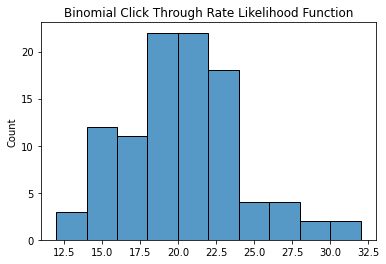

In [ ]:
# We'll use that as the likelihood. Let's visualize the number of clicks generated by 100 impressions 
# assuming that the click-through rate is 0.2.
# So we import the visualization tool seaborn as sns, 
import seaborn as sns
# and use the sns.histplot function to create a histogram showing the nunber of clicks produced.
# We can set the title of the plot by adding .set function after declaring the histogram and typing the title
# on the title argument.
sns.histplot(stats.binom.rvs(100, 0.2, size = 100)).set(title = "Binomial Click Through Rate Likelihood Function")
# Awesome! So you'll see that the frequency of clicks is high around 15 and 25, and low on both sides.

[Text(0.5, 1.0, 'Prior Distribution of the click through rate')]

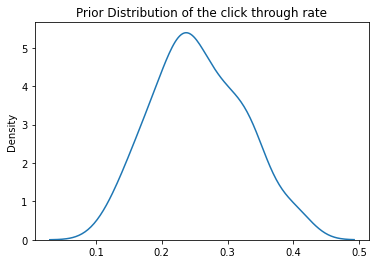

In [ ]:
# Now let's make a prior distribution. Without loss of generality, we can recall historical, personal
# experience on responding to online ads. Let's say I watched 40 advertisements yesterday and clicked
# on 10 ads out of them.
# So one proper choice of the prior distribution for the binary click-through behaviour is beta distribution.
# We create 100 random samples from the beta distribution with the first parameter equals 10 and the second 
# parameter equals 30, and size equals 100. Now we set the title of the kernel density plot to be
# the prior distribution of the click through rate.
sns.kdeplot(stats.beta.rvs(10,30, size = 100)).set(title = "Prior Distribution of the click through rate")
# You'll see that the probability density of the click-through rate prior peaks at somewhere between 0.2 and 0.3, 
# and drops almost symmetrically on both sides.

So now we can combine the prior distribution and the likelihood, use the Bayes' rule to update the click-through rate. Suppose what really happened to me today in the last 100 attempts of Google search was that I viewed and clicked into 30 of the ad websites suggested at the top of the result. 

![](assets/mongo_db.png)
Let's see how the posterior distribution of click-through rate would be updated after observing this user interaction evidence. 

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Posterior Distribution of Click Through Rate')]

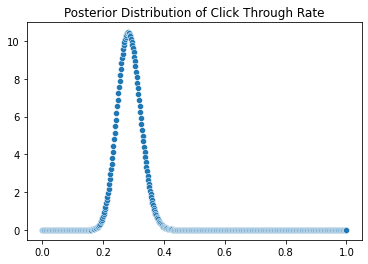

In [ ]:
# Given I clicked on the advertisement and visited 30 of the websites out of 100, we can create the clicks variable, set it to 30, 
clicks = 30 
# and the impressions variable and set it to 100.
impressions = 100

# A rapid way to visualize posterior distribution if we know exactly the parameters of the posterior distribution, is through a 
# scatterplot. 

# We import the numpy module
import numpy as np
# to create a linear span from 0 to 1 (because the possible outcome of a beta distribution ranges from 0 to 1)
x = np.linspace(0,1,500)
# and calculate the probability density of beta distribution at each x-axis value using the .pdf(x) function.
# Because Beta distribution is the conjugate prior of Binomial likelihood (Click-through rate measure the proportion of click, as opposed to not click),
# updating the prior distribution needs only to add the success (which is clicks) to the first parameter, and add the failure (which is impression - clicks)
# to the second parameter.
posterior = stats.beta(10 + clicks, 30 + impressions - clicks).pdf(x)
# So let's take in the x and y axes value-pairs to plot a scatterplot for the posterior distribution of click-through rate!
sns.scatterplot(x, posterior).set(title = "Posterior Distribution of Click Through Rate")

# Cool the graph shows that with the evidence, the posterior distribution of click-through rate peaks at somewhere around 0.3, and 
# the probability density tapers off almost symmetrically on both sides.


[Text(0.5, 1.0, 'Cost Distribution')]

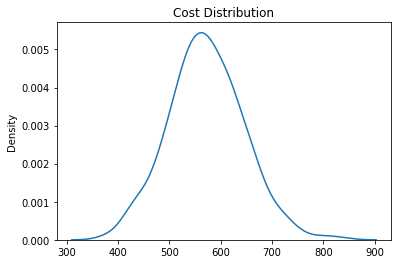

In [ ]:
# But what makes this posterior result really useful for business analysts? 
# Why does understanding CTR of an ad is critical for both advertisers and for search engine providers?
# One use case of the CTR is that we can use the posterior distribution of CTR to derive the cost distribution. 
# For example, how much might we, as advertisers, spend on an advertisement for every 10000 impressions if the cost per click is 0.2?

# Here's my solution. We can randomly sample the posterior distribution of the click-through rate 500 times
posterior_sample = stats.beta.rvs(10 + clicks, 30 + impressions - clicks, size = 500)
# and define the cost per click as 0.2 
cost_per_click = 0.2
# and set the number of impressions to 10000.
number_of_impressions = 10000
# Now we can apply the formula cost = click-through rate times cost per click times the number of impressions to a seaborn kernel density plot.
sns.kdeplot(posterior_sample * cost_per_click * number_of_impressions).set(title = 'Cost Distribution')
# This kernel density plot then returns you the cost distribution that the advertiser is expected to spend on online advertisement,
# per 10000 impressions if the cost per click is 0.2. As you can see, the advertiser should expect that the advertisement cost 
# is likely to fall between 500 and 650 dollars, which I would consider quite expensive.

[Text(0.5, 1.0, 'Cost Distribution')]

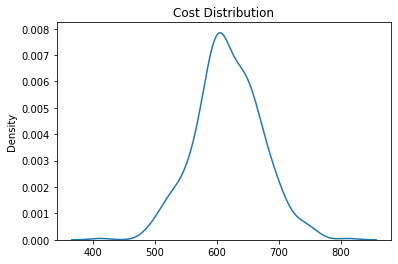

In [ ]:
# As you have learned that chaining Bayes' rule is the meat of Bayesian inference, as I continue to collect evidence, this time I watched
# another 150 online advertisements on Google search engine, and I clicked and visited 50 websites among them, how would the cost estimation 
# change after I made another 50 clicks in the next 150 impressions?

# So I can, again, create a variable called clicks2 and set it as 50, 
clicks2 = 50
# and impressions2 and set it as 150.
impressions2 = 150

# Of course, we also update the distribution by adding clicks2 to the first parameter, and adding the failures 
# (which is impressions2 subtracted by clicks2) to the second parameter. We again, randomly sample 500 times of
# the posterior distribution.
new_posterior_sample = stats.beta.rvs(10 + clicks + clicks2, 30 + (impressions - clicks) + (impressions2 - clicks2), size = 500)
# and apply the cost formula to the seaborn kernel density plot.
sns.kdeplot(new_posterior_sample * cost_per_click * number_of_impressions).set(title = 'Cost Distribution')
# Cool! Now you'll need to spend around 50 dollars more per 10000 impressions. It's because of the probability increase
# in the latest observations given by clicks2 divided by impressions2, so that the click-through rate is updated
# to become higher in the second prediction. 

It's interesting to play around with different problems regarding click-through rate. In one tutorial in the third course of the specialization, we'll apply the Bayesian A/B testing techniques to compare several websites with differnet web design components and choose the best platform based on Bayesian modeling. But let's hold off this idea a bit until the third course. There's a decent article discussing this topic if you feel really interested in.

Reference: https://www.moengage.com/blog/understanding-bayesian-ab-testing-analyze-experiment-results/

In this lecture, we've learned about a crucial application of click-through rate on online advertising. Particularly, we've modeled the cost distribution based on the posterior distribution of click-through rate. We also highlighted that the convenient Bayesian updating of click-through rate is a salient advantage of using conjugate prior, in this case, the Beta distribution for binary data. We'll see you in the next video!

In [ ]:
# Appendix: False Click!
# Fraud click detection

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d164461f-c4b7-4df2-b711-3a9e5e978d4a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>